# Decision Tree

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("C:/Users/rushi/OneDrive/Desktop/Projects DS,ML,DL,AI/GitHub Uploded Resporatory/FacePrep/bill_authentication.csv")

In [3]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
dataset.shape

(1372, 5)

In [5]:
x = dataset.iloc[:,:-1]
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [6]:
y = dataset.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

# Train and test Dataset

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [9]:
print("xtrain Size:",xtrain.shape)
print("xtest Size:",xtest.shape)

print("ytrain Size:",ytrain.shape)
print("ytest Size:",ytest.shape)

xtrain Size: (1029, 4)
xtest Size: (343, 4)
ytrain Size: (1029,)
ytest Size: (343,)


# Training

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [12]:
# Prediction
y_pred = model.predict(xtest)

In [19]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred)
print(cm)

[[191   4]
 [  3 145]]


# Accuracy of the model

In [14]:
#Accuracy of the model
from sklearn.metrics import accuracy_score
print("Accuracy of the model: {0:0.2f} %".format(accuracy_score(ytest,y_pred)*100))

Accuracy of the model: 97.96 %


# Printing the Tree

In [16]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

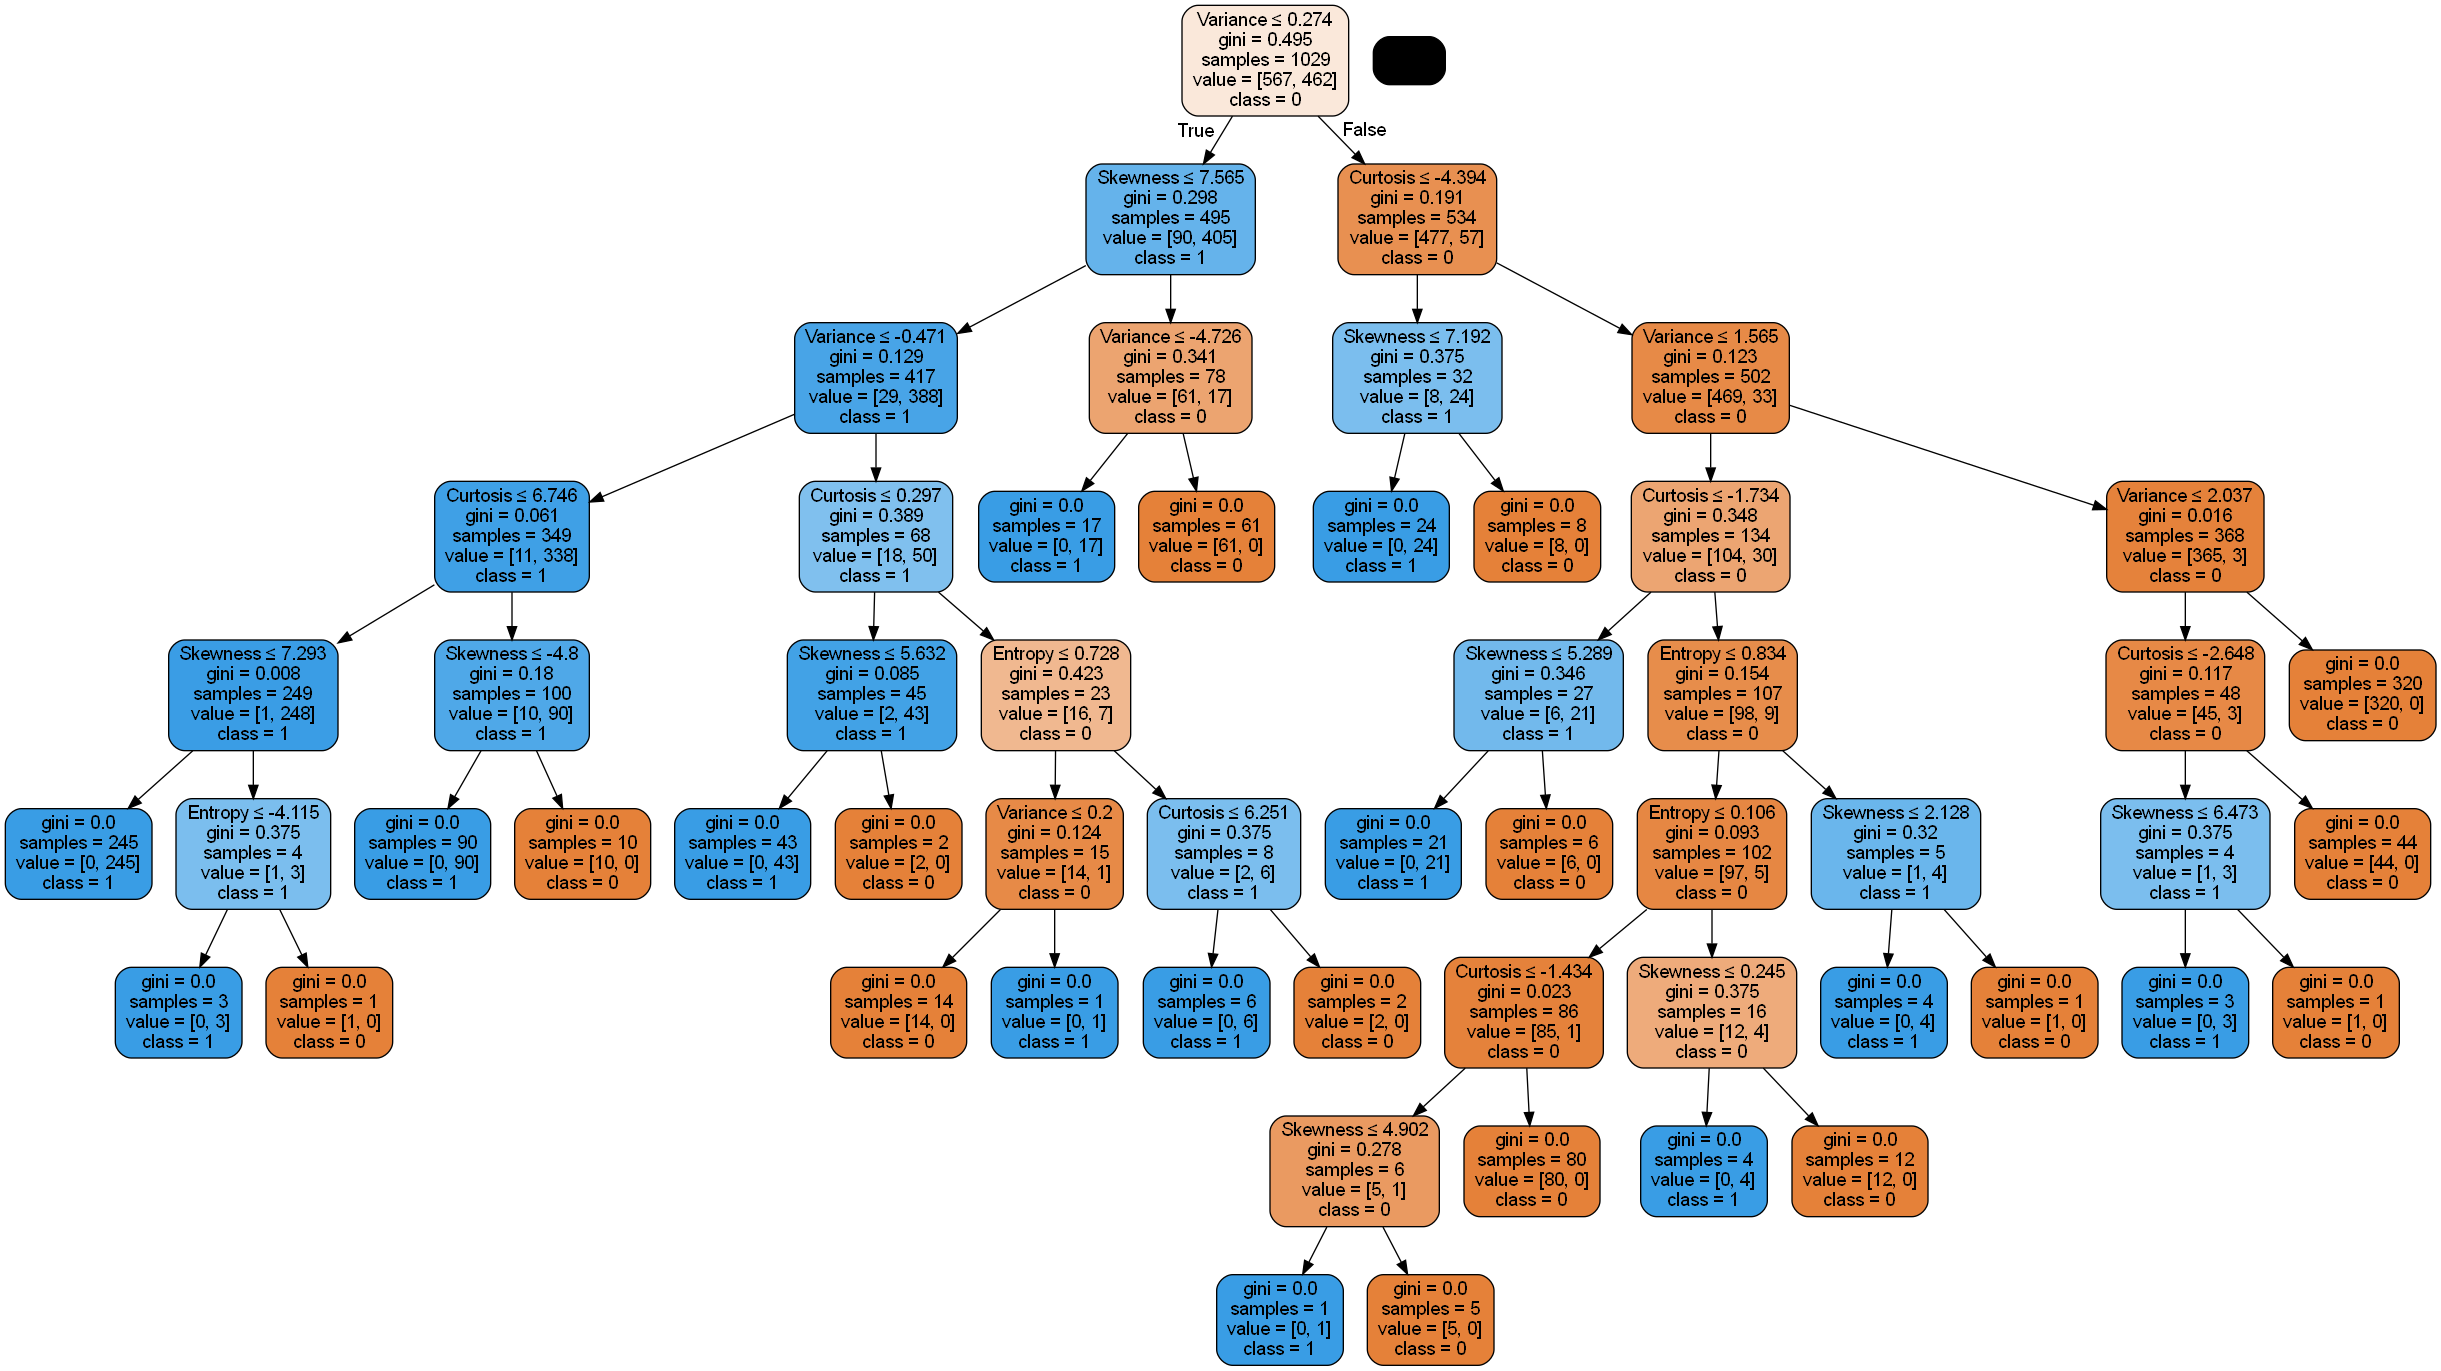

In [18]:
dotdata = StringIO()
export_graphviz(model, out_file=dotdata,
               filled=True, rounded=True,
               special_characters=True,feature_names = ['Variance','Skewness','Curtosis','Entropy'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dotdata.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

# Thank You